In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('SPY.csv')
data

Date        Open        High         Low       Close   Adj Close  \
0    2023-03-06  405.049988  407.450012  404.010010  404.470001  398.414642   
1    2023-03-07  404.420013  404.670013  397.630005  398.269989  392.307434   
2    2023-03-08  398.390015  399.709991  396.589996  398.920013  392.947723   
3    2023-03-09  399.739990  401.480011  390.529999  391.559998  385.697937   
4    2023-03-10  390.989990  393.160004  384.320007  385.910004  380.132507   
..          ...         ...         ...         ...         ...         ...   
247  2024-02-28  505.329987  506.859985  504.959991  506.260010  506.260010   
248  2024-02-29  508.070007  509.739990  505.350006  508.079987  508.079987   
249  2024-03-01  508.980011  513.289978  508.559998  512.849976  512.849976   
250  2024-03-04  512.030029  514.200012  512.000000  512.299988  512.299988   
251  2024-03-05  510.239990  510.700012  504.910004  507.179993  507.179993   

        Volume  
0     72795900  
1    108310600  
2     74746600  
3    111945300  
4    189253000  
..         ...  
247   56506600  
248   83924800  
249   76805900  
250   49799300  
251   72855600  

[252 rows x 7 columns]

<Axes: >

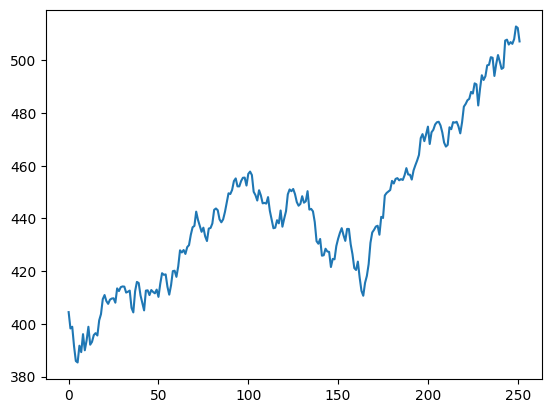

In [3]:
data['Close'].plot()

In [9]:
#Split the data into training and testing data sets
train_data = data.iloc[:int(.99*len(data)), :]
test_data = data.iloc[int(.99*len(data)):, :]

In [4]:
#Define the features and target variables
features = ['Open', 'Volume']
target = 'Close'

In [10]:
#Create and train the model
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
#Make and show the predictions on the test data
predictions = model.predict(test_data[features])
print('Model Predictions:')
print(predictions)

Model Predictions:
[507.8155  506.23093 507.2658 ]


In [13]:
#Show the actual values
print('Actual Values:')
print(test_data[target])

Actual Values:
249    512.849976
250    512.299988
251    507.179993
Name: Close, dtype: float64


In [15]:
#Show the models accuracy
accuracy = model.score(test_data[features], test_data[target])
print('Accuracy:')
print(accuracy)

Accuracy:
-2.1800735444621284


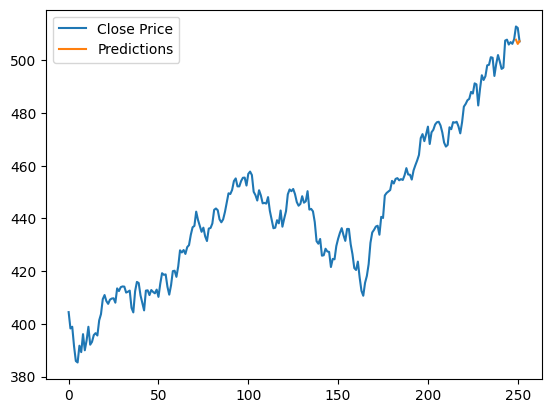

In [17]:
#Plot the predictions and the close price
plt.plot(data['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'Predictions')
plt.legend()
plt.show()